## Citations

Rollings, A. (2020). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python, hiive extended remix. https://github.com/hiive/mlrose. Accessed: Sept 28, 2020

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: Sept 28, 2020

(Timer) https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python

In [2]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit

## N-Queens

In [3]:
# define fitness

fitness = mlrose.Queens()
num_Queens = 15

In [10]:
problem = mlrose.DiscreteOpt(num_Queens, fitness_fn = fitness, maximize = True, max_val=num_Queens)
max_iters = 20000
max_attempts = 200

### Randomized Hill Climbing

In [11]:
start = timeit.default_timer()
best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_attempts = max_attempts, max_iters=max_iters, restarts=3, curve=True, init_state = None, random_state=1)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 1.8170732329999737s


In [12]:
len(rhc_curve)

902

In [13]:
max_iters_list=[50,100,250,500,1000,2000,5000]
max_attempts_list=[100,200,500]
num_Queens_list=[8,10,12,15,18,20]

for max_iters in max_iters_list:
    for max_attempts in max_attempts_list:
        for num_Queens in num_Queens_list:
            start = timeit.default_timer()
            best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_attempts=max_attempts, 
                                                                           max_iters=max_iters, 
                                                                           restarts=3, curve=True, 
                                                                           init_state = None, random_state=1)
            end = timeit.default_timer()

            print(f'Max Iteration: {max_iters}, Max_Attempts: {max_attempts}, Num_Queens: {num_Queens}, Wall time: {end-start}s')
            print(f'Number of iterations: {len(rhc_curve)}, Best Fitness: {best_fitness}')

Max Iteration: 50, Max_Attempts: 100, Num_Queens: 8, Wall time: 0.15206338599818991s
Number of iterations: 50, Best Fitness: 48.0
Max Iteration: 50, Max_Attempts: 100, Num_Queens: 10, Wall time: 0.13964430099804304s
Number of iterations: 50, Best Fitness: 48.0
Max Iteration: 50, Max_Attempts: 100, Num_Queens: 12, Wall time: 0.1522732490011549s
Number of iterations: 50, Best Fitness: 48.0
Max Iteration: 50, Max_Attempts: 100, Num_Queens: 15, Wall time: 0.14442064999821014s
Number of iterations: 50, Best Fitness: 48.0
Max Iteration: 50, Max_Attempts: 100, Num_Queens: 18, Wall time: 0.15372068699798547s
Number of iterations: 50, Best Fitness: 48.0
Max Iteration: 50, Max_Attempts: 100, Num_Queens: 20, Wall time: 0.13736417299878667s
Number of iterations: 50, Best Fitness: 48.0
Max Iteration: 50, Max_Attempts: 200, Num_Queens: 8, Wall time: 0.1750249430006079s
Number of iterations: 50, Best Fitness: 48.0
Max Iteration: 50, Max_Attempts: 200, Num_Queens: 10, Wall time: 0.17175431299983757s
N

Max Iteration: 500, Max_Attempts: 200, Num_Queens: 15, Wall time: 1.1732062490009412s
Number of iterations: 500, Best Fitness: 158.0
Max Iteration: 500, Max_Attempts: 200, Num_Queens: 18, Wall time: 1.1647711139994499s
Number of iterations: 500, Best Fitness: 158.0
Max Iteration: 500, Max_Attempts: 200, Num_Queens: 20, Wall time: 1.1391311360021064s
Number of iterations: 500, Best Fitness: 158.0
Max Iteration: 500, Max_Attempts: 500, Num_Queens: 8, Wall time: 1.1343129989982117s
Number of iterations: 500, Best Fitness: 158.0
Max Iteration: 500, Max_Attempts: 500, Num_Queens: 10, Wall time: 1.1229145679972135s
Number of iterations: 500, Best Fitness: 158.0
Max Iteration: 500, Max_Attempts: 500, Num_Queens: 12, Wall time: 1.1457531329979247s
Number of iterations: 500, Best Fitness: 158.0
Max Iteration: 500, Max_Attempts: 500, Num_Queens: 15, Wall time: 1.169833762000053s
Number of iterations: 500, Best Fitness: 158.0
Max Iteration: 500, Max_Attempts: 500, Num_Queens: 18, Wall time: 1.168

Max Iteration: 5000, Max_Attempts: 500, Num_Queens: 20, Wall time: 3.0911108489999606s
Number of iterations: 1515, Best Fitness: 145.0


### Simulated Annealing

In [5]:
start = timeit.default_timer()
best_state, best_fitness, sa_curve = mlrose.simulated_annealing(problem=problem, max_attempts=100, max_iters=max_iters, curve=True, random_state=None)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 0.12038667300000006s


### Genetic Algorithm

In [6]:
start = timeit.default_timer()
best_state, best_fitness, ga_curve = mlrose.genetic_alg(problem=problem, pop_size=200, mutation_prob=0.3, max_attempts=100, max_iters=max_iters, curve=True, random_state=None)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 13.042104974s


### MIMIC

In [7]:
start = timeit.default_timer()
best_state, best_fitness, mimic_curve = mlrose.mimic(problem, pop_size = 300, keep_pct = 0.2, max_attempts = max_attempts, 
                                                     max_iters = max_iters,  curve = True, random_state = 1)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 52.585198872s


In [8]:
plot_dict = dict(x=np.arange(1,max_iters+1),
                 Random_Hill = rhc_curve,
                 Sim_Anneal = sa_curve,
                 Genetic_Alg = ga_curve,
                 MIMIC = mimic_curve)

In [9]:
df = pd.DataFrame.from_dict(plot_dict, orient='index')
df = df.transpose()
df.head()

,x,Random_Hill,Sim_Anneal,Genetic_Alg,MIMIC
0,1.0,13.0,16.0,28.0,27.0
1,2.0,13.0,16.0,28.0,30.0
2,3.0,16.0,18.0,28.0,57.0
3,4.0,16.0,18.0,31.0,57.0
4,5.0,16.0,19.0,31.0,57.0


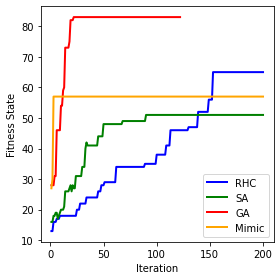

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot('x', 'Random_Hill', data=df, marker='', c='Blue', markeredgecolor='w', linewidth=2, label='RHC')
ax.plot('x', 'Sim_Anneal', data=df, marker='', c='Green', markeredgecolor='w', linewidth=2, label='SA')
ax.plot('x', 'Genetic_Alg', data=df, marker='', c='Red', markeredgecolor='w', linewidth=2, label='GA')
ax.plot('x', 'MIMIC', data=df, marker='', c='Orange', markeredgecolor='w', linewidth=2, label='Mimic')
ax.set_xlabel('Iteration')
ax.set_ylabel('Fitness State')
ax.legend()

fig.tight_layout()